<h2>Logistic Regrssion</h2>
<p>Contrast the process of determining a continuous linear relationship with a classification problem:</p>
<h4>Continous</h4>
<ul>
<li>E.g. Daily caloric intake to BMI</li>
<li>We expect a continuous relationship (at least somewhat) that can be sort of fitted to $y=mx+b$</li>
<li>There aren't discrete states here</li>
</ul>
<h4>Classification/Categorical</h4>
<ul>
<li>For binary features e.g. yes/no, male/female, dead/not-dead the target prediction is not a continuous variable</li>
<li>Therefore, we need to make some transformations using the <a href="https://en.wikipedia.org/wiki/Logit">logit function:</a></li>
$\sigma(t)=\frac{e^t}{1+e^t}$
<ul><li>breaking it down:</li>
<ul><li>$e^t$ is the exponential transformation, which transforms all values to positive values</li>
<li>$\frac{t}{1+t}$ is the normalization function, which transforms all values to the range $(0,1)$</li></ul>
</ul></ul>

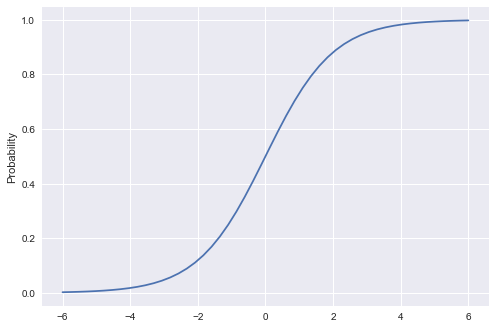

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


# use np to generate logit function
# Logit Function
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 

# generate 50 evenly spaced real values between -6 and 6
x = np.linspace(-6,6,50, dtype=float)

y=logit(x)
plt.plot(x,y)
plt.ylabel('Probability')
plt.show()
    

<p>Above, we see that the y-axis values are:</p>
<ul><ul>
<li>positive between 0 and 1 for all values of x</li>
<li>represent the probability of each x value in positive terms, regardless of whether the x value is itself positive</li>
</ul></ul>
<p>We can also extend this to a greater range to verify that it holds for all values of x:</p>


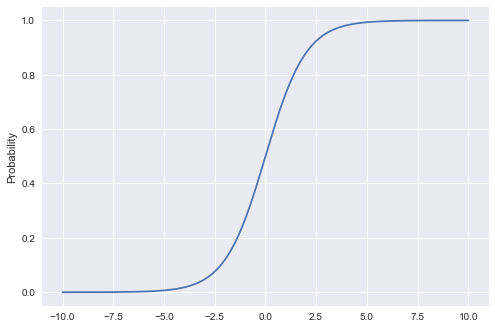

In [2]:
x = np.linspace(-10,10,500, dtype=float)

y=logit(x)
plt.plot(x,y)
plt.ylabel('Probability')
plt.show()
    

<h3>scikit-learn <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression class:</a></h3>
<p>````
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(feature, classification)
````</p>
<p>The logistic model returns a <em>probability</em> that a row should be labeled 1 or 0 for True/False, M/F, etc.</p>
<p>To return the predicted probability, use the ````predict_proba```` method. The only required parameter for this method is the num_features by num_sample matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values for each row, which (duh) always add up to 1:</p>
<ul>
<li>$P(row = 0)$</li>
<li>$P(row = 1)$</li>
</ul>
<p>
````
probabilities = logistic_model.predict_proba(feature)
# prob that row belongs to 0:
probabilities[:,0]
# prob that row belongs to 1:
probabilities[:,1]
````
</p>
<p>In the same way that the LinearRegression class uses .predict() method to make predictions, the LogisticRegression class does as well. We can use the same arguments as ````predict_proba```` to make predictions using a feature</p>
<p>
````
fitted_labels = logistic_model.predict(feature)
# returns NumPy array with most likely probablity for each row
````
</p>



In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
data = "Data\\admission.csv"
admissions = pd.read_csv(os.path.relpath(data))
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


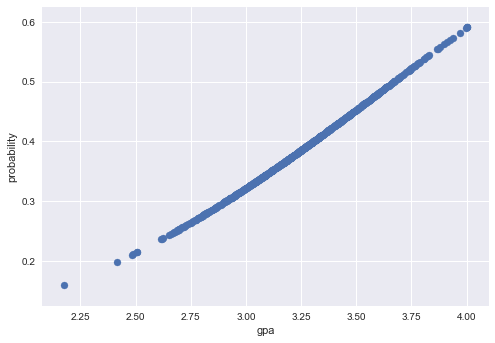

In [4]:
# Create instance of LogisticRegression class
logistic_model = LogisticRegression()
# Fit logistic model
logistic_model.fit(admissions[["gpa"]],admissions["admit"])
# Produce fitted labels
fitted_labels = logistic_model.predict(admissions[['gpa']])
# Produce predicted probabilities
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions.gpa,pred_probs[:,1])
plt.ylabel("probability")
plt.xlabel("gpa")
plt.show()


In [23]:
# Now let's add the predictions to the DataFrame and do some assessments
# Add prediced labels to dataframe
admissions['predicted_labels']=fitted_labels

# Generate boolean column for agreement
admissions['agreement'] = admissions['predicted_labels']==admissions['admit']
# calculate accuracy (# accurate predictions/ Total observations)
accuracy = admissions[admissions['agreement']==True].shape[0]/admissions.shape[0]
print(accuracy)
print('{}% correct predictions; slightly better than chance!'.format(round(accuracy*100,3)))

0.6459627329192547
64.596% correct predictions; slightly better than chance!


<H3>Evaluating Binary Classification Models</H3>
<p>Above the raw accuracy of the model is ~65%, which is a little better than chance. However, there are distinct ways in which the model can miss a prediction:</p>
<table>
    <tr>
    <td>Prediction</td><td>Observation</td><td></td>
    </tr>
    <tr>
    <td></td><td>Admitted (1)</td><td>Rejected (0)</td>
    </tr>
    <tr>
    <td>Admitted (1)</td><td>True Positive</td><td>False Positive</td>
    </tr>
    <tr>
    <td>Rejected (0)</td><td>False Negative</td><td>True Negative</td>
    </tr>
    </table>
    
    

In [25]:
# Lez see how we did:
true_positives = admissions[(admissions['admit']==1) & (admissions['predicted_labels']==1)].shape[0]
true_negatives = admissions[(admissions['admit']==0) & (admissions['predicted_labels']==0)].shape[0]
print(true_positives)
print(true_negatives)

31
385


<h3>Evaluating Logistic Models: Beyond Raw Accuracy, babyyy</h3>
<p>The $Sensitivity$ or True Positive Rate answers the question: How effective is this model at identifying positive (true instances of) outcomes?</p>
<p>
$TPR=\frac{True\:Positives}{True\:Positives + False\:Negatives}$</p>
<p>A highly sensitive model is desirable in tests that want to catch all the positives, even if some are false positives. Think medical screen versus diagnostic test here</p>

In [29]:
# Calculate model sensitivity:
# Calculate false negatives
false_negatives = admissions[(admissions['admit']==1) & (admissions['predicted_labels']==0)].shape[0]
# Divide true positives by sum of true positives and false_negatives

sensitivity = true_positives/(true_positives+false_negatives)
print(sensitivity)
print("so we're catching about 12% of our true positive cases")

0.12704918032786885
so we're catching about 12% of our true positive cases


<p>So the model is pretty shitty at catching the positive cases. Good thing this is something idiotic like grad school admissions and not cancer screening</p>
<p>Now we want to figure out $Specificity$, or the rate at which the model detects true negatives. A high specificity means a model is better at determining which cases should be rejected. In cases where there is a high cost to erroneously labeling cases as positive</p>
<p>
$TNR\:(Specificity)=\frac{True\:Negatives}{False\:Positives+True\:Negatives}$</p>

In [30]:
false_positives = admissions[(admissions['admit']==0) & (admissions['predicted_labels']==1)].shape[0]
specificity = true_negatives/(false_positives+true_negatives)
print(specificity)
print('so we\'re correctly labelling about {}% of our true negative cases'.format(round(specificity*100,3)))

0.9625
so we're correctly labelling about 96.25% of our true negative cases
